# Olist E-Commerce Website Data Analysis 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, confusion_matrix
import datetime
import random

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
sns.set()
pd.options.display.max_columns = 100

# Fonctions d'automatisation

In [2]:
# take df, make copy, show info() and return the dataframe
def copy_get_info_df(df):
    new_df = df.copy()
    new_df.info()
    print('total missing values : ', new_df.insull().sum())
    print('the shape is : ', new_df.shape)
    return new_df
#-------------------------------------------------------------------
# pass list of dataframes and get all the infos, shape, missing values at once 
def get_all_df_info(dataframes):
    df_names = ['customer data :','order items : ','order payments : ','order reviews :','orders datasets : ','products datasets : ','sellers : ','product translation :']
    for name,df in zip(df_names,dataframes):
        print('INFORMATION ABOUT', name,'\n')
        new_df = df.copy()
        df.info()
        print('\n Total missing values:\n', new_df.isnull().sum(),'\n')
        print('Shape : ', new_df.shape)
        print('\n')
        print('-----------------------------------------------------')
#---------------------------------------------------------------------
        
        

### Loading the Data

In [3]:
master_df1 = pd.read_csv('data_cleaned.csv')

In [4]:
master_df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,year,month,credit_card,debit_card,voucher,time_elapsed_delivery,Recency,Frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,2017,10,1,0,0,8,335,4
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,2017,10,0,0,1,8,335,4
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,2017,10,0,0,1,8,335,4
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,493e9a0b23de35d37871a6e8940f822a,5,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,bebes,35.0,2395.0,1.0,350.0,19.0,14.0,12.0,7025,guarulhos,SP,baby,2017,9,1,0,0,1,335,4
4,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,1,credit_card,3,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares,2017,8,1,0,0,2,383,1


# Machine Learning Applications



## (Unsupervised Learning)

In [5]:
#selecting numeric columns
#creating dataframe that has only numeric columns then extract them easy
numeric_df = master_df1.select_dtypes(exclude=[object,'datetime'])
numeric_columns = list(numeric_df.columns.values)


In [6]:
columns_to_remove = ['product_height_cm', 'product_width_cm', 'product_length_cm', 'payment_installments', 'order_item_id', 'price', 'month','order_item_id']

numeric_list_clean = [element for element in numeric_columns if element not in columns_to_remove]


In [7]:
numeric_list_clean.append('customer_unique_id')

In [8]:
# Very high level of groupby use ! 
# we are grouping by customer ids and aggregating every column on what it should be 
clustering_customers_df = master_df1[numeric_list_clean]
clustering_customers_df = clustering_customers_df.groupby('customer_unique_id').agg({ 'review_score': 'mean', 'payment_value':'sum'
           ,'product_weight_g': 'mean','product_photos_qty':'mean','product_name_lenght':'mean','Recency':'max','Frequency':'sum'
           ,'credit_card':'sum','debit_card':'sum'}).reset_index()

clustering_customers_df.head()

,customer_unique_id,review_score,payment_value,product_weight_g,product_photos_qty,product_name_lenght,Recency,Frequency,credit_card,debit_card
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,141.90,1500.0,1.0,60.0,115,1,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,27.19,375.0,1.0,56.0,118,1,1,0
2,0000f46a3911fa3c0805444483337064,3.0,86.22,1500.0,3.0,49.0,541,1,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,43.62,150.0,5.0,43.0,325,1,1,0
4,0004aac84e0df4da2b147fca70cf8255,5.0,196.89,6050.0,3.0,58.0,292,1,1,0


<Figure size 864x720 with 0 Axes>

Text(0.5, 1, 'Corrélations entres les features')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

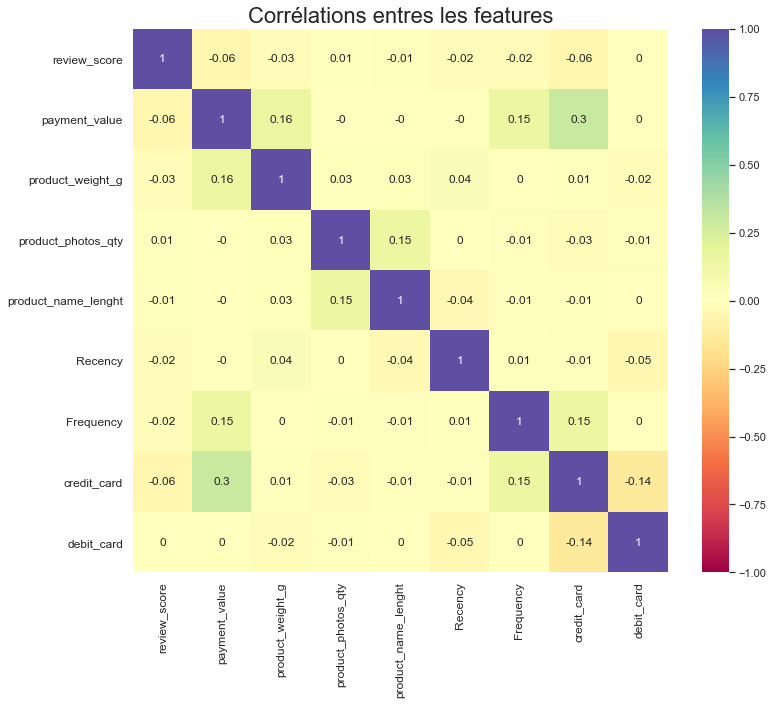

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(clustering_customers_df.corr().round(2), xticklabels=clustering_customers_df.corr().columns, yticklabels=clustering_customers_df.corr().columns, cmap='Spectral',vmin=-1, vmax=1, annot=True)

plt.title('Corrélations entres les features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Scale numeric columns before K-means

In [10]:
# selecting numeric columns
numeric_df1 = clustering_customers_df.select_dtypes(exclude=[object])
num_columns = list(numeric_df1.columns.values)
num_columns

['review_score',
 'payment_value',
 'product_weight_g',
 'product_photos_qty',
 'product_name_lenght',
 'Recency',
 'Frequency',
 'credit_card',
 'debit_card']

In [11]:
from sklearn.preprocessing import StandardScaler
#instantiate scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df1)
data_scaled.shape

(94094, 9)

In [12]:
# slicing data for T-SNE
sliced_data = numeric_df1.sample(10000,random_state=9)
sclaed_sliced_data = scaler.transform(sliced_data)
sliced_data_df = pd.DataFrame(data = sclaed_sliced_data, columns=sliced_data.columns)
sliced_data_df.head()

,review_score,payment_value,product_weight_g,product_photos_qty,product_name_lenght,Recency,Frequency,credit_card,debit_card
0,-2.310470,-0.224056,0.543725,1.005327,-0.084601,-0.423376,-0.058497,0.114957,-0.115175
1,-1.562505,0.006890,-0.323904,1.581524,0.117351,-0.599693,-0.058497,0.114957,-0.115175
2,-0.315896,0.534944,-0.194872,0.621195,0.554913,-0.358073,0.313256,2.795690,-0.115175
3,-2.310470,-0.000803,-0.510778,-0.723265,0.319303,-0.625814,-0.058497,0.114957,-0.115175
4,-2.310470,-0.184633,-0.470734,-0.723265,0.117351,-1.265780,-0.058497,0.114957,-0.115175


# Unsupervised Learning using K-means

## coefficient silhouette

In [24]:
from sklearn.metrics import silhouette_score
silh = []
for i in range(2,10):
    kmeans = KMeans(i,n_jobs=-1, verbose=3,random_state=9)
    kmeans.fit(sliced_data_df)
    silhouhaite = silhouette_score(sliced_data_df, kmeans.labels_)
    silh.append(silhouhaite)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

<Figure size 1008x576 with 0 Axes>

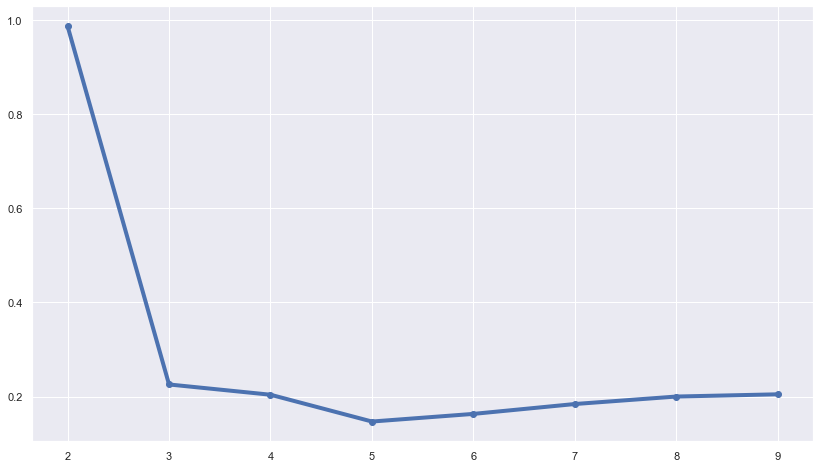

In [25]:
# plot coef shilouaite
plt.figure(figsize=(14,8))
plt.plot(range(2,10), silh, linewidth=4, marker='o')

In [15]:
# KMeans

kmeans = KMeans(3,random_state=9)
kmeans.fit(data_scaled)
predicted_df = sliced_data_df.copy()
predicted_df['cluster_pred'] = kmeans.predict(sliced_data_df) ## clusters remplace

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [16]:
predicted_df.sample(5)

,review_score,payment_value,product_weight_g,product_photos_qty,product_name_lenght,Recency,Frequency,credit_card,debit_card,cluster_pred
8420,0.681391,-0.018290,0.183326,1.005327,-0.286553,0.921858,-0.058497,0.114957,-0.115175,1
6479,0.681391,-0.216486,-0.290534,-0.147068,0.723206,-1.089463,-0.058497,0.114957,-0.115175,1
9989,0.681391,-0.070921,-0.517452,1.581524,0.925158,0.164347,-0.058497,0.114957,-0.115175,1
1860,0.681391,-0.099484,-0.377297,-0.723265,0.117351,-0.789071,-0.058497,0.114957,-0.115175,1
7635,-0.814540,-0.235209,-0.510778,-0.723265,0.420278,-1.402915,-0.058497,0.114957,-0.115175,1


In [17]:
from sklearn.manifold import TSNE
import sklearn
tsne = TSNE(n_components=2,init='pca',n_jobs=-1,random_state=9,verbose=3,perplexity=60)
data_embedded = tsne.fit_transform(sliced_data_df)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.075s...
[t-SNE] Computed neighbors for 10000 samples in 0.961s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.414207
[t-SNE] Computed conditional probabilities in 0.601s
[t-SNE] Iteration 50: error = 80.7562027, gradient norm = 0.0021068 (50 iterations in 3.274s)
[t-SNE] I

<Figure size 1008x576 with 0 Axes>

[None, None]

[None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Clustering Customers')

(array([-100.,  -50.,    0.,   50.,  100.,  150.,  200.]),
 <a list of 7 Text xticklabel objects>)

(array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 <a list of 11 Text yticklabel objects>)

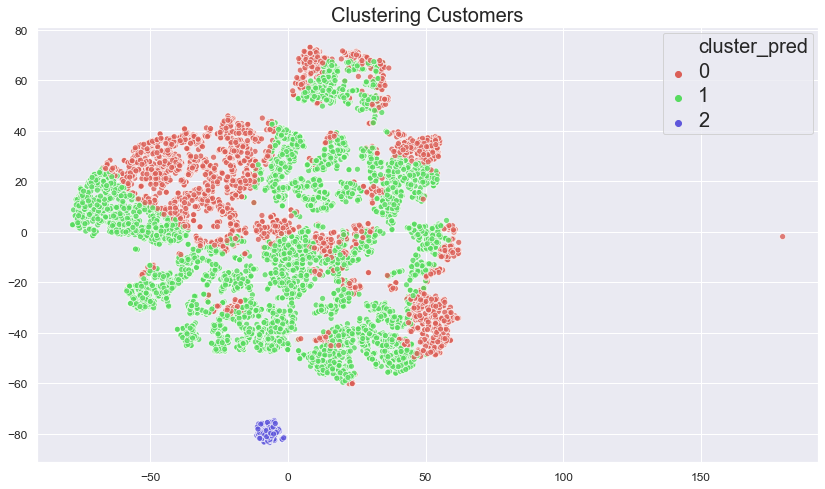

In [19]:
plt.figure(figsize=(14,8))
ax = sns.scatterplot(x=data_embedded[:,0], y=data_embedded[:,1], alpha=0.8,\
                x_jitter=0.5, y_jitter=0.5, hue=predicted_df['cluster_pred'],\
                palette=sns.color_palette("hls", n_colors=3));


plt.setp(ax.get_legend().get_title(), fontsize='25')
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.title('Clustering Customers'.title(), fontsize=20);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()